In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [28]:
dataset=pd.read_csv("autos_dataset1.csv")

In [29]:
dataset.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [30]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 1) Symboling

In [32]:
dataset["symboling"].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

# 2) normalized-losses 

In [33]:
dataset["normalized-losses"].value_counts()   #here we get the all value counts

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [34]:
dataset.replace("?",np.nan,inplace=True)
dataset["normalized-losses"].value_counts()  #here we make the ? to NULL 

normalized-losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64

In [37]:
dataset["normalized-losses"].isnull().sum()  # here we checks the isnull()

41

In [40]:
dataset["normalized-losses"]=dataset["normalized-losses"].astype(float)  #here we change the datatype to fill the null values with median

In [44]:
dataset["normalized-losses"].dtype

dtype('float64')

In [46]:
dataset["normalized-losses"].fillna(dataset["normalized-losses"].median(),inplace=True)  #here we fill null with median()

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 3) make

In [49]:
dataset["make"].isnull().sum()

0

In [47]:
dataset["make"].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

# 4) fuel-type

In [51]:
dataset["fuel-type"].isnull().sum()

0

In [52]:
dataset["fuel-type"].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

# 5) aspiration

In [54]:
dataset["aspiration"].isnull().sum()

0

In [55]:
dataset["aspiration"].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

# 6) num-of-doors

In [58]:
dataset["num-of-doors"].isnull().sum()

2

In [59]:
dataset["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [63]:
dataset["num-of-doors"].fillna(dataset["num-of-doors"].mode()[0],inplace=True)

In [64]:
dataset["num-of-doors"].isnull().sum()

0

In [65]:
dataset["num-of-doors"].value_counts()

num-of-doors
four    116
two      89
Name: count, dtype: int64

# 7) body-style

In [67]:
dataset["body-style"].isnull().sum()

0

In [68]:
dataset["body-style"].value_counts()

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

# 8) drive-wheels

In [69]:
dataset["drive-wheels"].isnull().sum()

0

In [72]:
dataset["drive-wheels"].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

# 9) engine-location

In [73]:
dataset["engine-location"].isnull().sum()

0

In [74]:
dataset["engine-location"].value_counts()

engine-location
front    202
rear       3
Name: count, dtype: int64

# 10) wheel-base

In [76]:
dataset["wheel-base"].isnull().sum()

0

In [77]:
dataset["wheel-base"].value_counts()

wheel-base
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: count, dtype: int64

# 11) length

In [79]:
dataset["length"].isnull().sum()

0

In [80]:
dataset["length"].value_counts()

length
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: count, Length: 75, dtype: int64

# 12) width

In [83]:
dataset["width"].isnull().sum()

0

In [84]:
dataset["width"].value_counts()

width
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: count, dtype: int64

# 13) height

In [85]:
dataset["height"].isnull().sum()

0

In [86]:
dataset["height"].value_counts()

height
50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: count, dtype: int64

## 14) curb-weight

In [90]:
dataset["curb-weight"].isnull().sum()

0

In [91]:
dataset["curb-weight"].value_counts()

curb-weight
2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: count, Length: 171, dtype: int64

## 15) engine-type

In [92]:
dataset["engine-type"].isnull().sum()

0

In [93]:
dataset["engine-type"].value_counts()

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

## 16) num-of-cylinders

In [99]:
dataset["num-of-cylinders"].isnull().sum()

0

In [100]:
dataset["num-of-cylinders"].value_counts()

num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

## 17) engine-size

In [101]:
dataset["engine-size"].isnull().sum()

0

In [102]:
dataset["engine-size"].value_counts()

engine-size
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: count, dtype: int64

## 18) fuel-system

In [104]:
dataset["fuel-system"].isnull().sum()

0

In [105]:
dataset["fuel-system"].value_counts()

fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

## 19) bore

In [110]:
dataset["bore"].isnull().sum()

4

In [108]:
dataset["bore"].value_counts()

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: count, dtype: int64

In [114]:
dataset["bore"].dtype

dtype('O')

In [116]:
dataset["bore"]=dataset["bore"].astype(float)

In [117]:
dataset["bore"].dtype

dtype('float64')

In [118]:
dataset["bore"].fillna(dataset["bore"].median(),inplace=True)

In [119]:
dataset["bore"].isnull().sum()

0

## 20) stroke

In [121]:
dataset["stroke"].isnull().sum()

4

In [122]:
dataset["stroke"].value_counts()

stroke
3.4     20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.5      6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.9      3
2.9      3
3.08     2
2.19     2
2.68     2
3.1      2
4.17     2
2.8      2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: count, dtype: int64

In [125]:
dataset["stroke"]=dataset["stroke"].astype(float)

In [126]:
dataset["stroke"].fillna(dataset["stroke"].median(),inplace=True)

In [127]:
dataset["stroke"].isnull().sum()

0

## 21) compression-ratio

In [129]:
dataset["compression-ratio"].isnull().sum()

0

In [132]:
dataset["compression-ratio"].dtype

dtype('float64')

In [131]:
dataset["compression-ratio"].value_counts()

compression-ratio
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: count, dtype: int64

## 22) horsepower

In [133]:
dataset["horsepower"].isnull().sum()

2

In [134]:
dataset["horsepower"].dtype

dtype('O')

In [137]:
dataset["horsepower"]=dataset["horsepower"].astype(float)

In [141]:
dataset["horsepower"].fillna(dataset["horsepower"].median(),inplace=True)

In [142]:
dataset["horsepower"].value_counts()

horsepower
68.0     19
70.0     11
69.0     10
116.0     9
95.0      9
110.0     8
114.0     6
160.0     6
101.0     6
62.0      6
88.0      6
145.0     5
76.0      5
97.0      5
82.0      5
84.0      5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
182.0     3
90.0      3
121.0     3
152.0     3
85.0      3
73.0      3
161.0     2
94.0      2
56.0      2
112.0     2
184.0     2
155.0     2
156.0     2
52.0      2
100.0     2
162.0     2
176.0     2
140.0     1
115.0     1
134.0     1
78.0      1
48.0      1
288.0     1
143.0     1
142.0     1
200.0     1
58.0      1
55.0      1
60.0      1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: count, dtype: int64

In [143]:
dataset["horsepower"].isnull().sum()

0

## 23) peak-rpm

In [145]:
dataset["peak-rpm"].isnull().sum()

2

In [146]:
dataset["peak-rpm"].value_counts()

peak-rpm
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: count, dtype: int64

In [148]:
dataset["peak-rpm"]=dataset["peak-rpm"].astype(float)

In [150]:
dataset["peak-rpm"].fillna(dataset["peak-rpm"].median(),inplace=True)

In [152]:
dataset["peak-rpm"].isnull().sum()

0

## 24) city-mpg

In [153]:
dataset["city-mpg"].isnull().sum()

0

In [ ]:
dataset["city-mpg"].value_counts()

## 25) highway-mpg

In [156]:
dataset["highway-mpg"].isnull().sum()

0

In [157]:
dataset["highway-mpg"].value_counts()

highway-mpg
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: count, dtype: int64

## 26) price

In [159]:
dataset["price"].isnull().sum()

4

In [160]:
dataset["price"].value_counts()

price
8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 186, dtype: int64

In [162]:
dataset["price"].dtype

dtype('O')

In [167]:
dataset["price"]=dataset["price"].astype(float)

In [170]:
dataset["price"].fillna(dataset["price"].median(),inplace=True)

In [171]:
dataset["price"].isnull().sum()

0

In [172]:
dataset["price"].value_counts()

price
10295.0    5
8921.0     2
18150.0    2
8845.0     2
8495.0     2
          ..
16503.0    1
5389.0     1
6189.0     1
6669.0     1
22625.0    1
Name: count, Length: 186, dtype: int64

## Outliers Detection and Removed

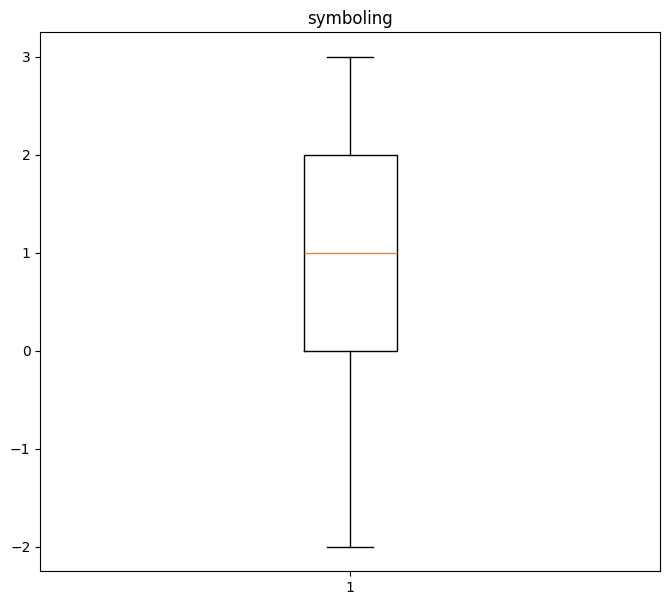

for column symboling
IQR----- 2.0
Upper Whisker--- 5.0
Lower Whisker--- -3.0


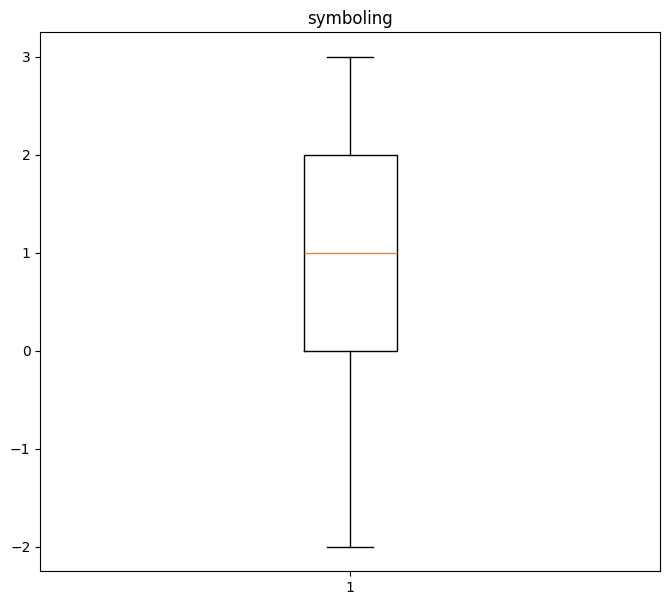

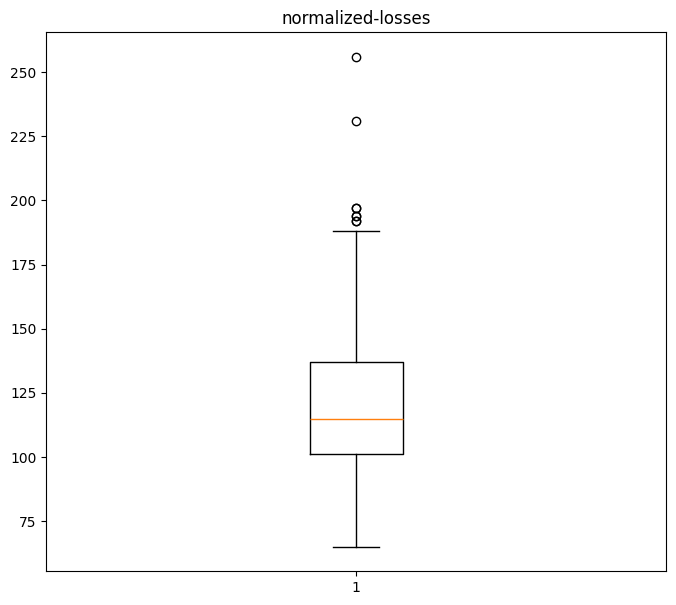

for column normalized-losses
IQR----- 36.0
Upper Whisker--- 191.0
Lower Whisker--- 47.0


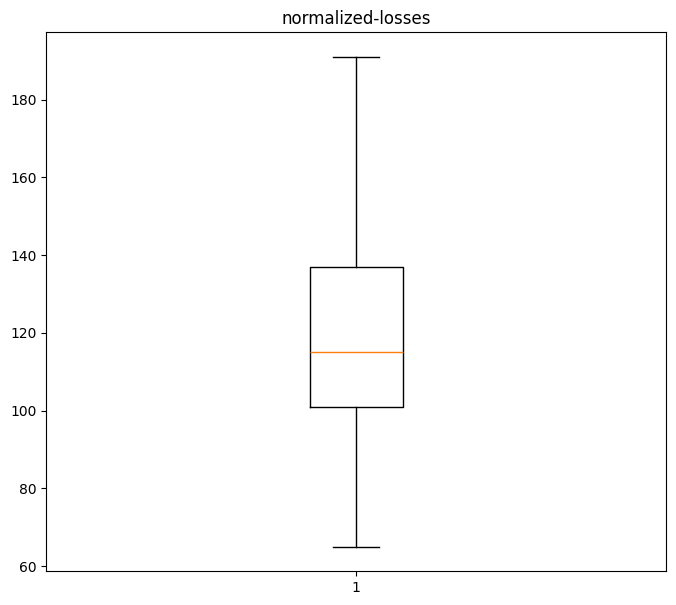

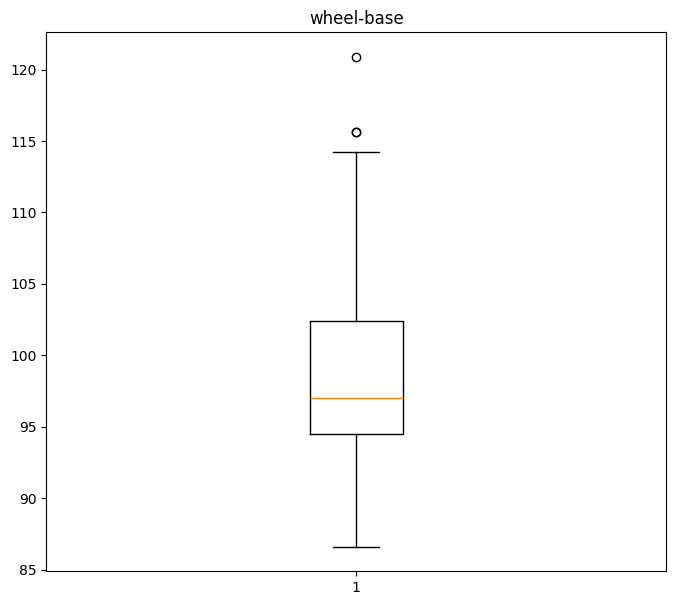

for column wheel-base
IQR----- 7.900000000000006
Upper Whisker--- 114.25000000000001
Lower Whisker--- 82.64999999999999


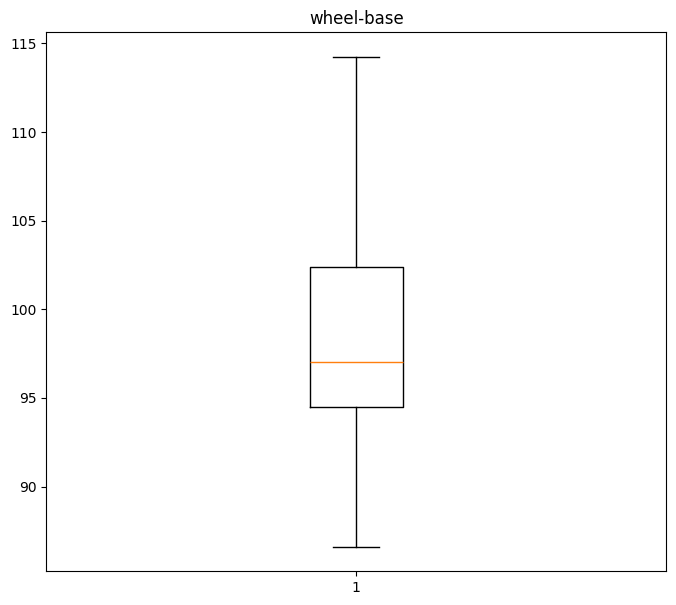

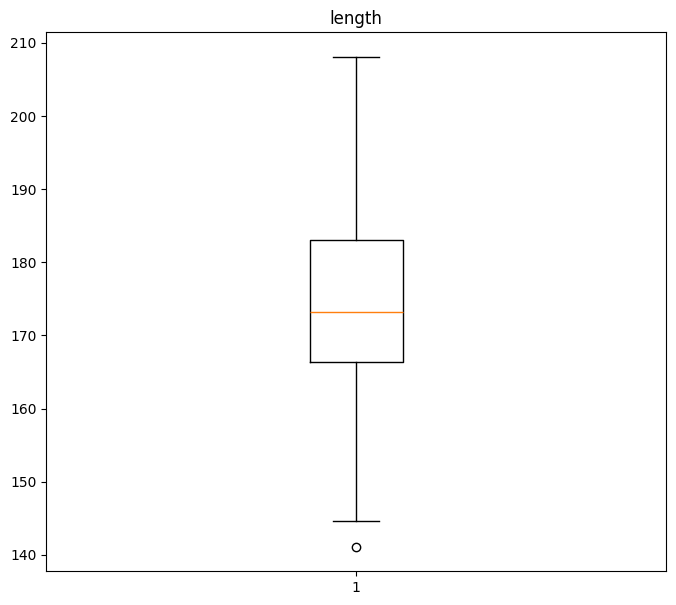

for column length
IQR----- 16.799999999999983
Upper Whisker--- 208.29999999999995
Lower Whisker--- 141.10000000000002


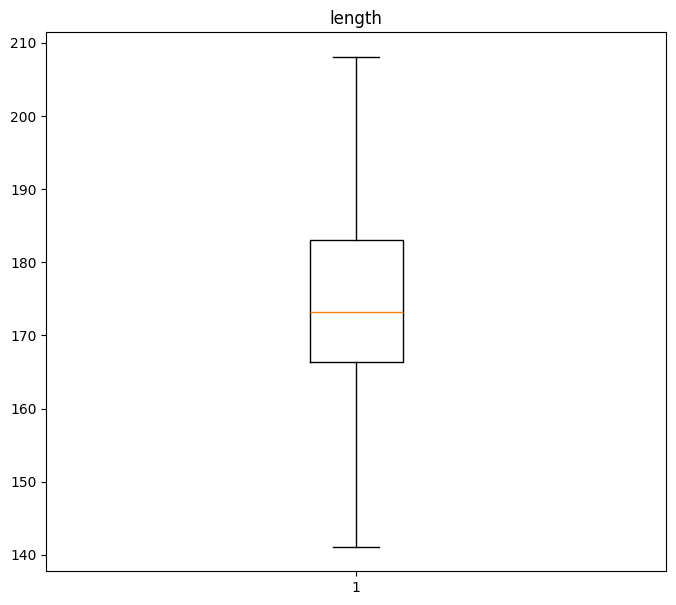

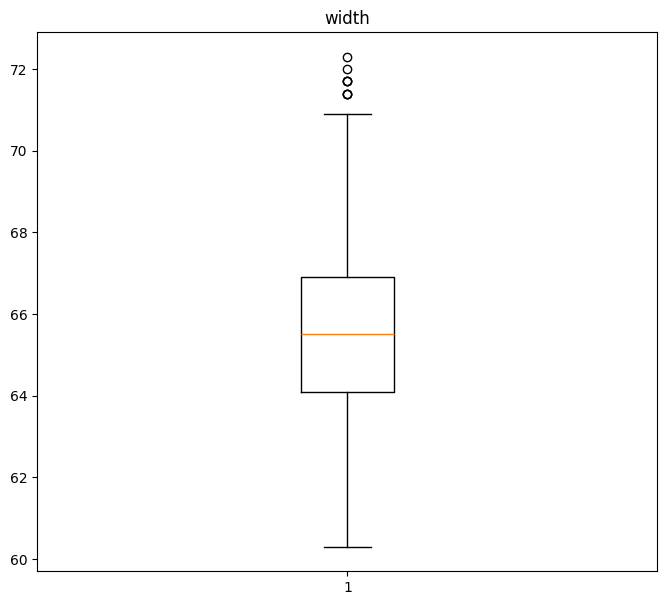

for column width
IQR----- 2.8000000000000114
Upper Whisker--- 71.10000000000002
Lower Whisker--- 59.89999999999998


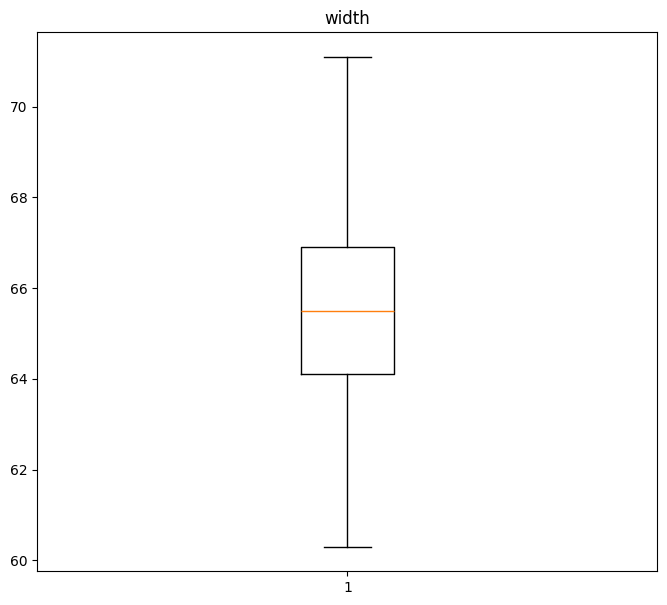

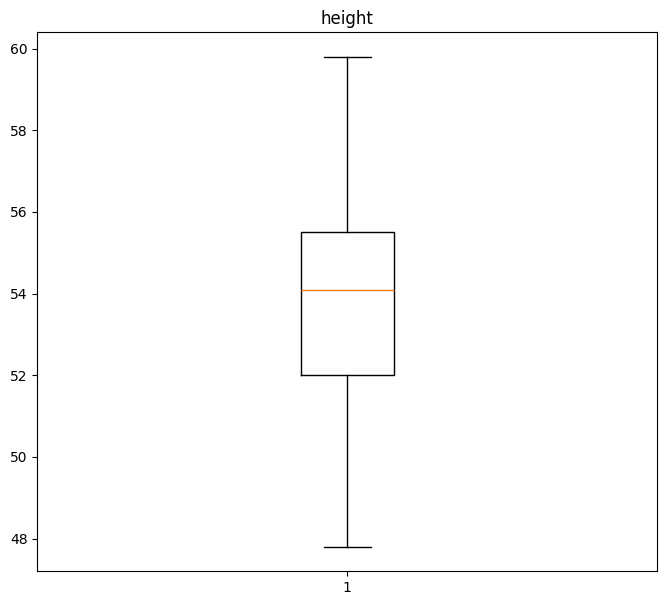

for column height
IQR----- 3.5
Upper Whisker--- 60.75
Lower Whisker--- 46.75


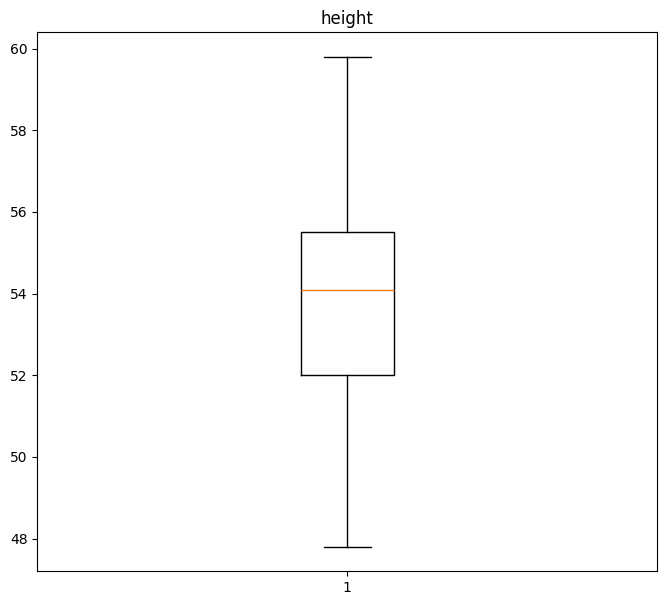

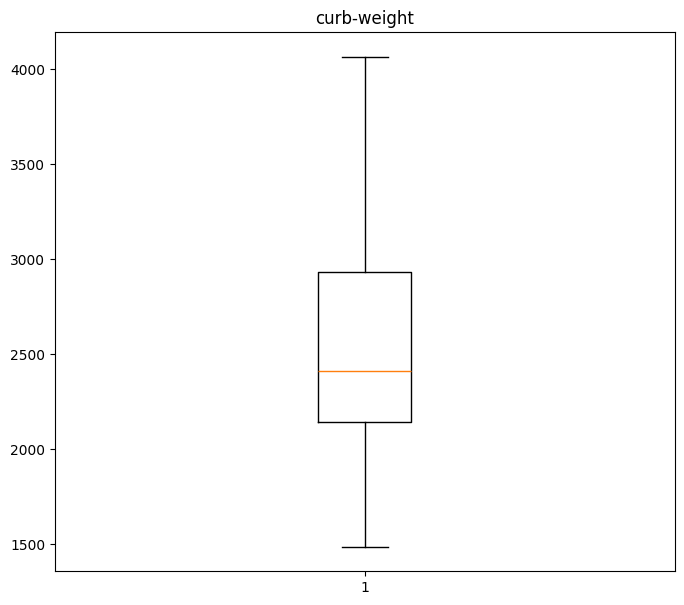

for column curb-weight
IQR----- 790.0
Upper Whisker--- 4120.0
Lower Whisker--- 960.0


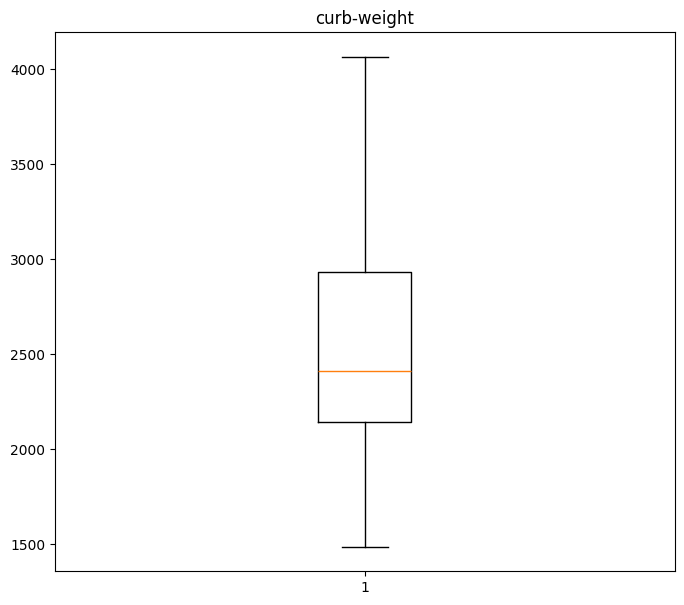

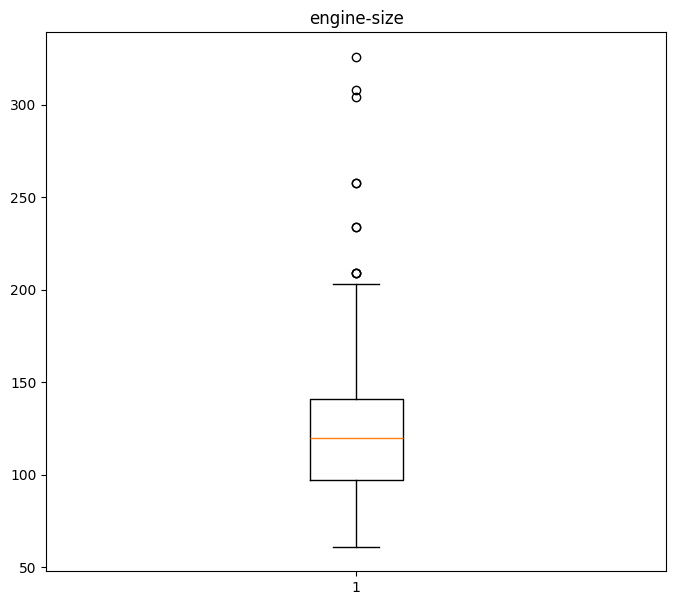

for column engine-size
IQR----- 44.0
Upper Whisker--- 207.0
Lower Whisker--- 31.0


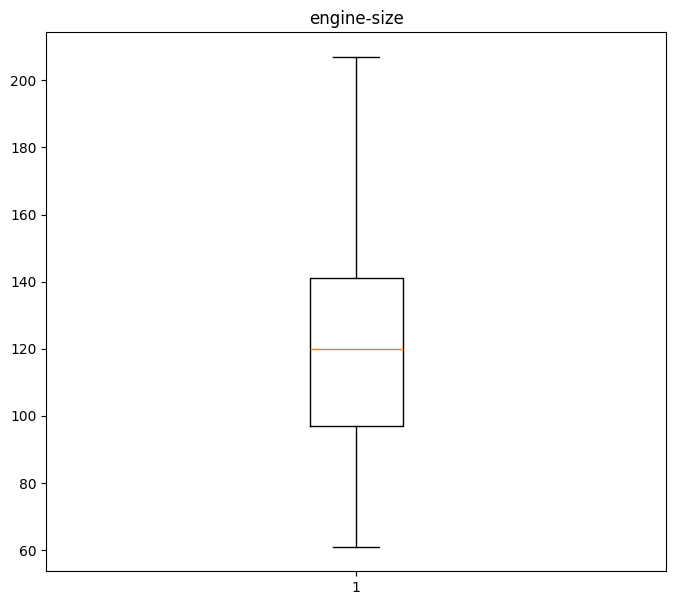

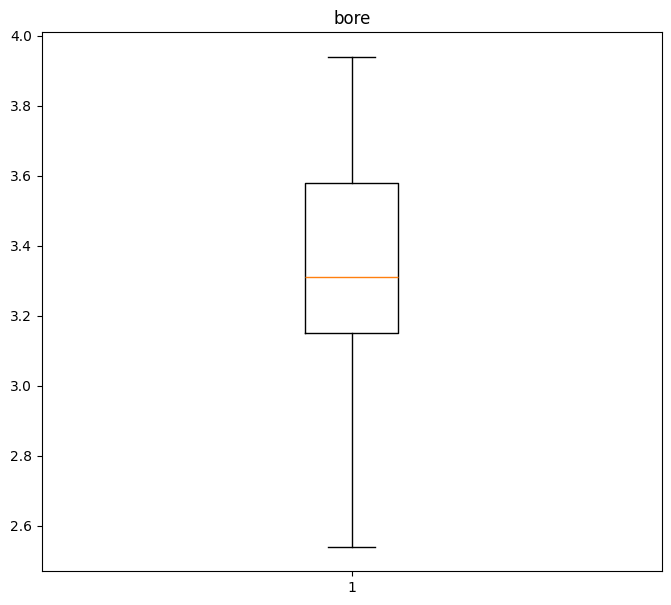

for column bore
IQR----- 0.43000000000000016
Upper Whisker--- 4.2250000000000005
Lower Whisker--- 2.505


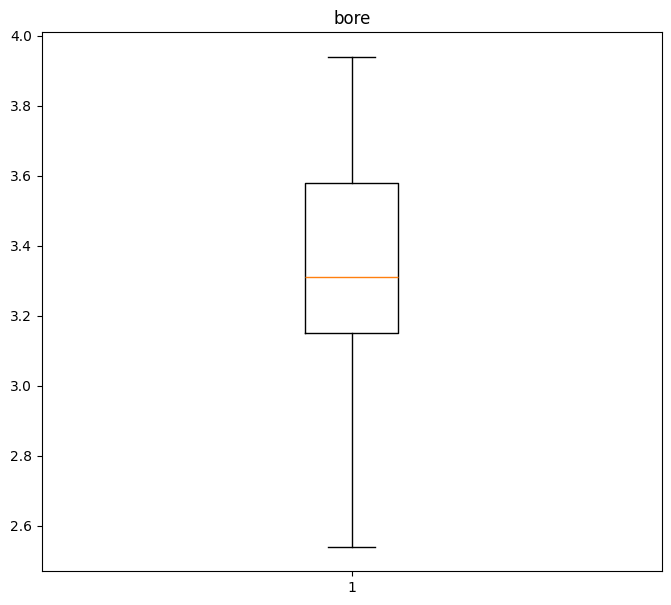

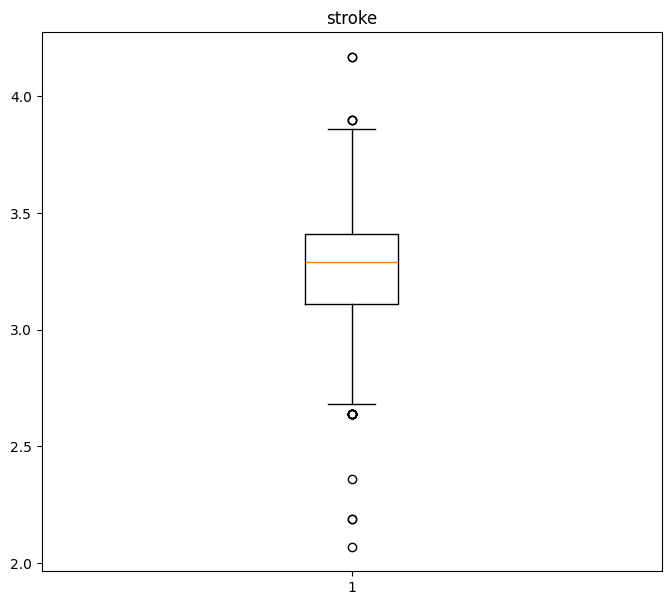

for column stroke
IQR----- 0.30000000000000027
Upper Whisker--- 3.8600000000000003
Lower Whisker--- 2.6599999999999993


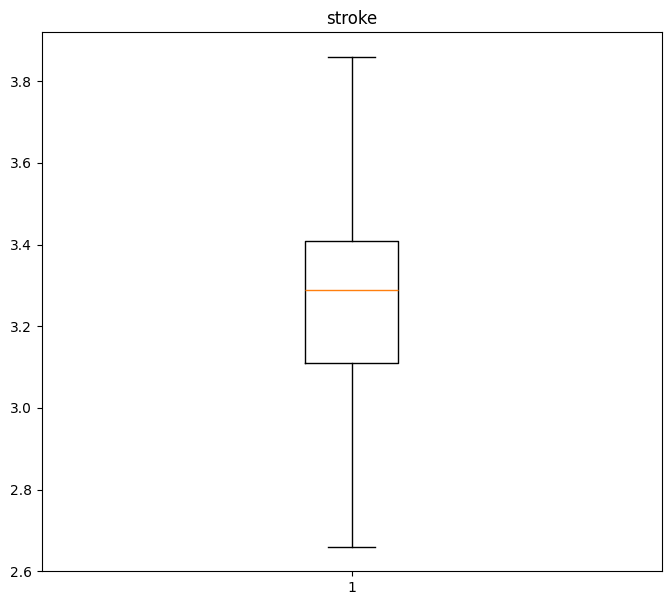

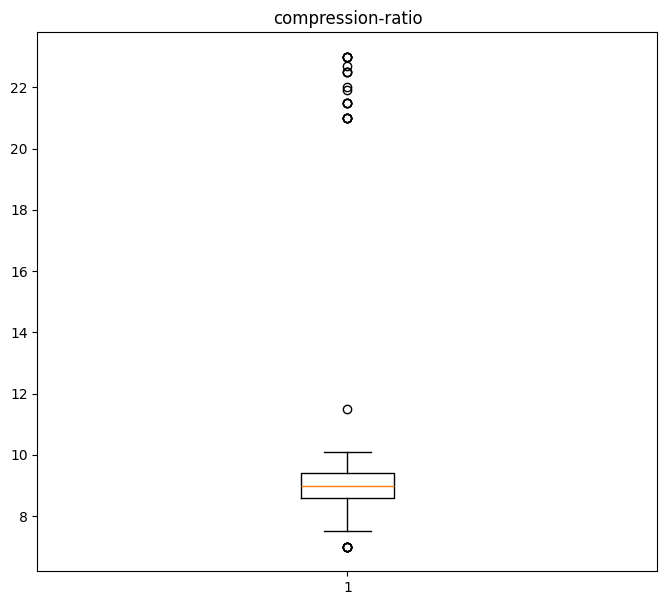

for column compression-ratio
IQR----- 0.8000000000000007
Upper Whisker--- 10.600000000000001
Lower Whisker--- 7.399999999999999


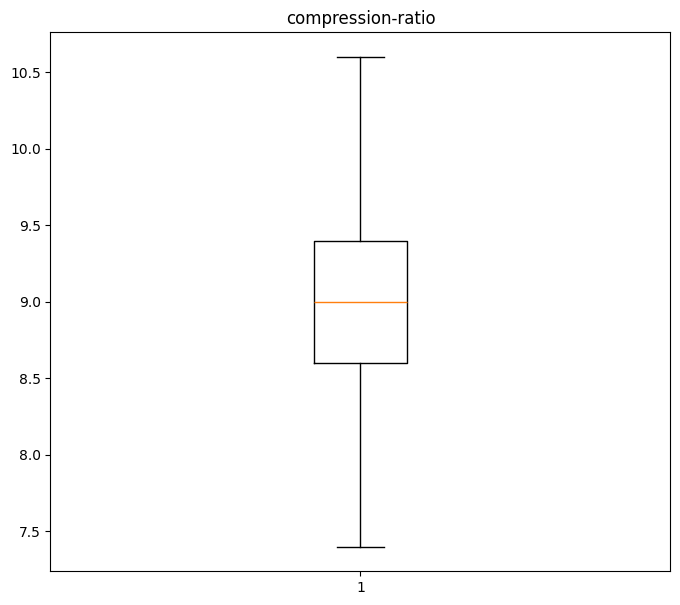

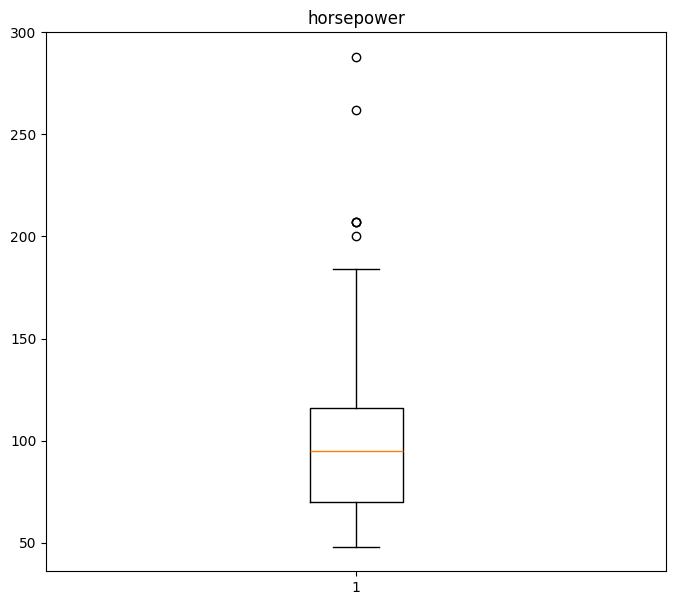

for column horsepower
IQR----- 46.0
Upper Whisker--- 185.0
Lower Whisker--- 1.0


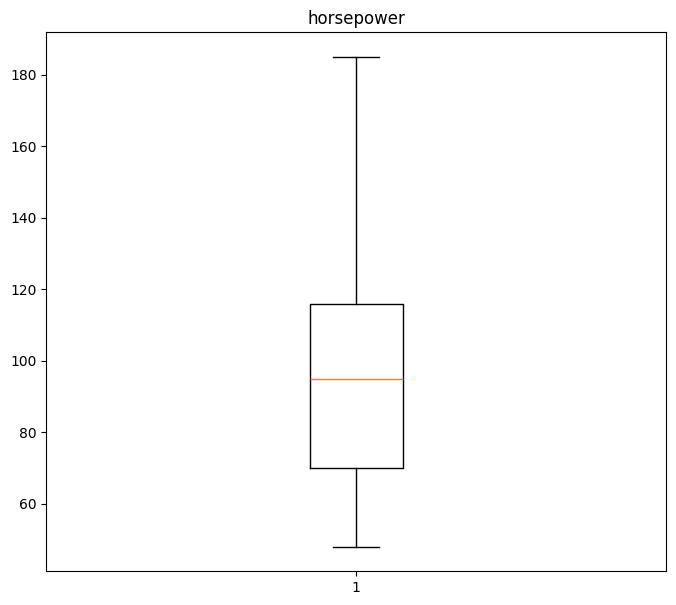

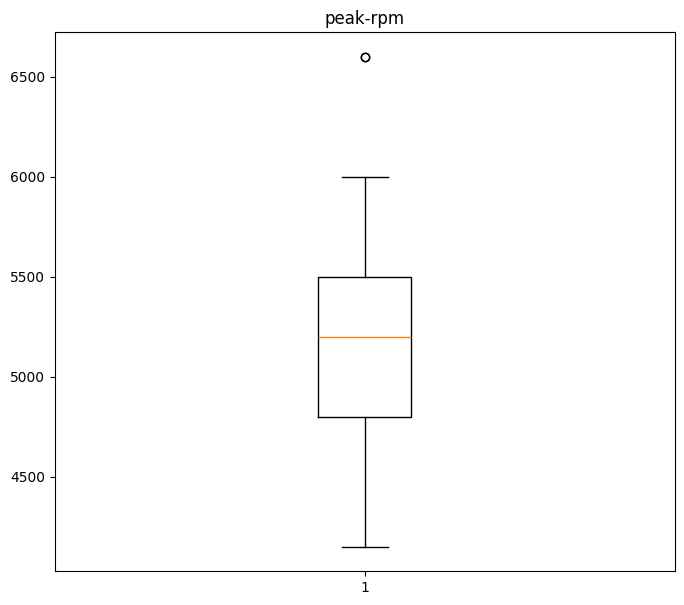

for column peak-rpm
IQR----- 700.0
Upper Whisker--- 6550.0
Lower Whisker--- 3750.0


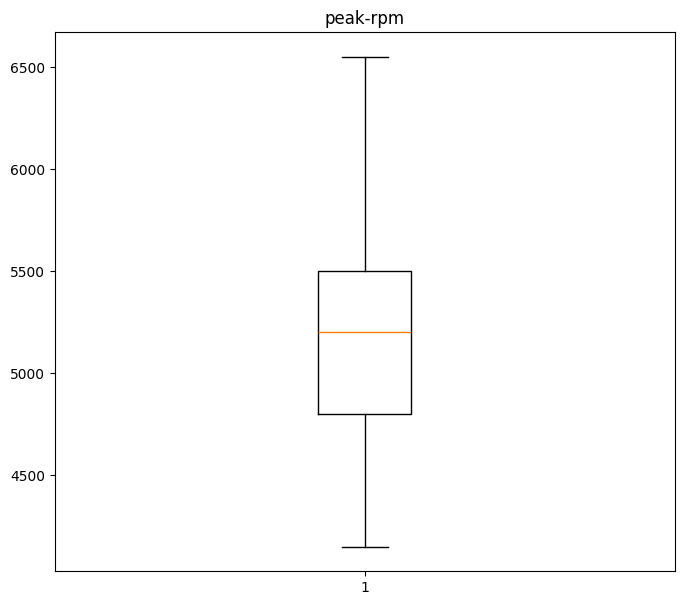

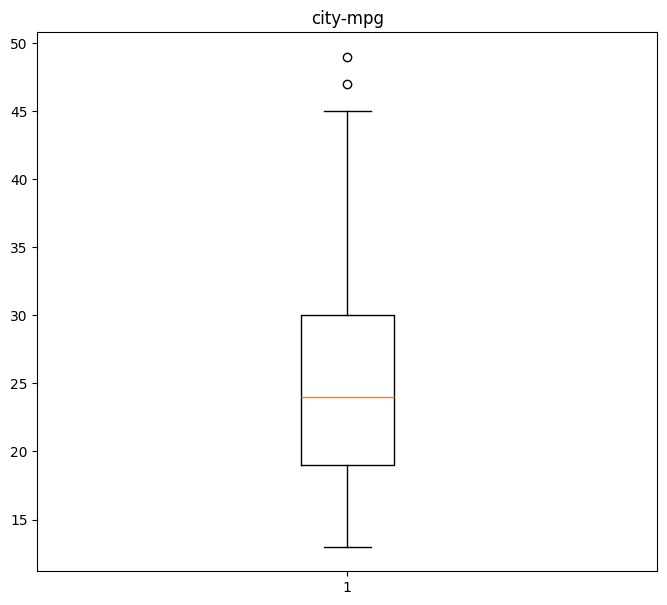

for column city-mpg
IQR----- 11.0
Upper Whisker--- 46.5
Lower Whisker--- 2.5


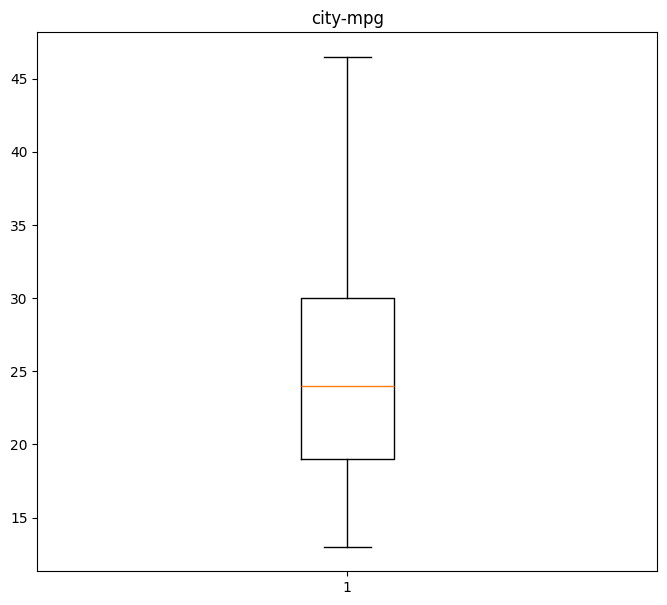

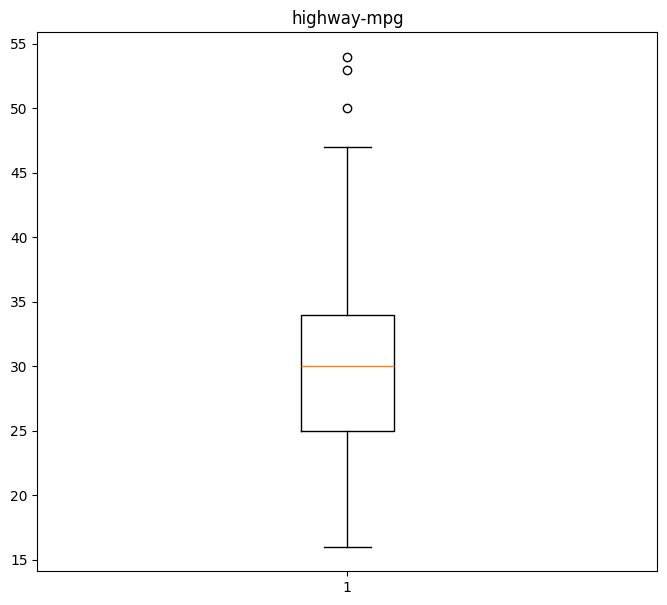

for column highway-mpg
IQR----- 9.0
Upper Whisker--- 47.5
Lower Whisker--- 11.5


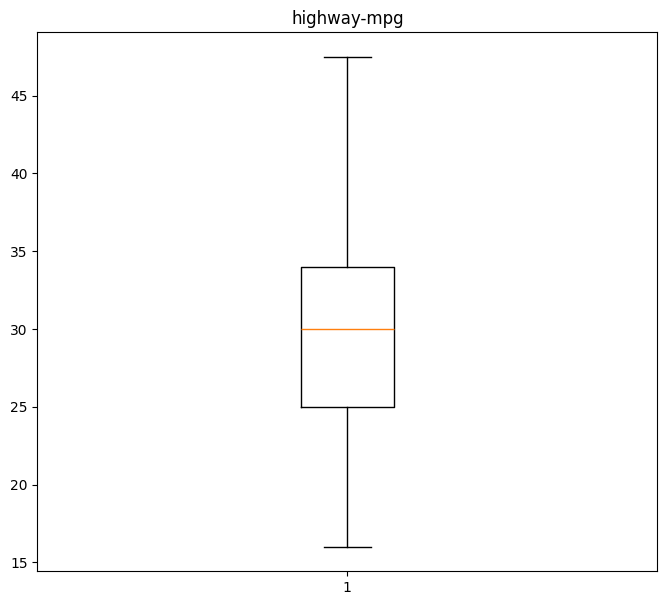

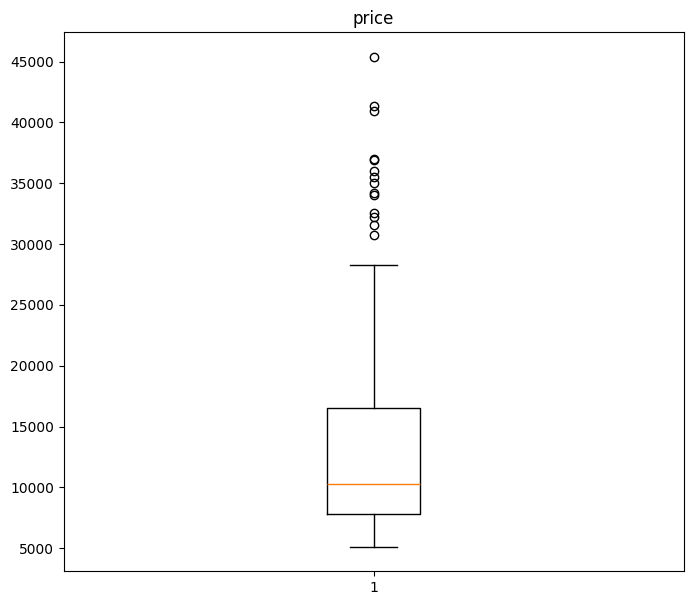

for column price
IQR----- 8712.0
Upper Whisker--- 29568.0
Lower Whisker--- -5280.0


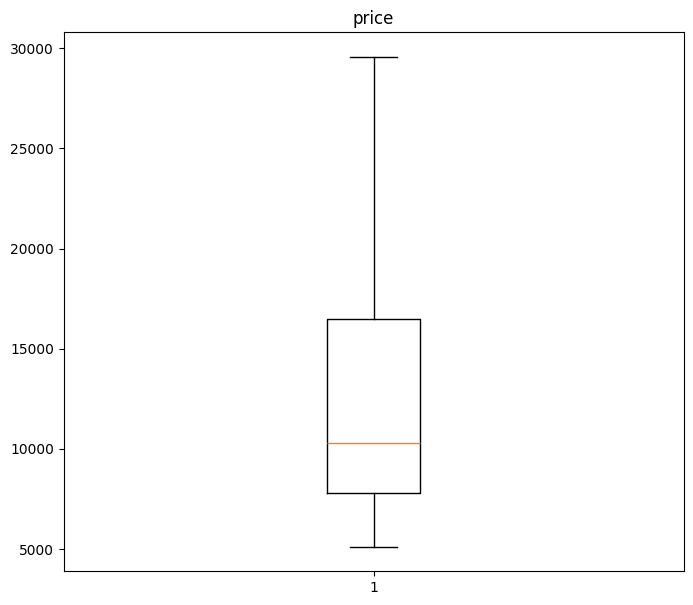

In [173]:
for  i in dataset.describe().columns:
    plt.figure(figsize=(8,7))
    plt.boxplot(dataset[i])
    plt.title(i)
    plt.show()

    
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    iqr=q3-q1
    uppr=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    print("for column" ,i) 
    print("IQR-----",iqr)
    print("Upper Whisker---",uppr)
    print("Lower Whisker---",lower)
    
    dataset.loc[dataset[i]<lower,i]=lower
    dataset.loc[dataset[i]>uppr,i]=uppr
    
    plt.figure(figsize=(8,7))
    plt.boxplot(dataset[i])
    plt.title(i)
    plt.show()

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Encoding 

In [175]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [177]:
object_columns = dataset.select_dtypes(include=['object']).columns

In [178]:
object_columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [179]:
for i in object_columns:
    dataset[i]=a.fit_transform(dataset[i])

In [180]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0


In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num-of-doors       205 non-null    int32  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int32  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int32  
 15  num-of-cylinders   205 non-null    int32  
 16  engine-size        205 non

## Scalling

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
ms=MinMaxScaler()

In [186]:
for i in dataset.columns:
    dataset[i]=ms.fit_transform(dataset[[i]])

In [187]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.396825,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,...,0.472603,0.714286,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.349206,0.342618
1,1.0,0.396825,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,...,0.472603,0.714286,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.349206,0.465521
2,0.6,0.396825,0.000000,1.0,0.0,1.0,0.50,1.0,0.0,0.285714,...,0.623288,0.714286,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104,0.317460,0.465521
3,0.8,0.785714,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.477396,...,0.328767,0.714286,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358,0.444444,0.361227
4,0.8,0.785714,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.462929,...,0.513699,0.714286,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254,0.190476,0.504376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.238095,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,...,0.547945,0.714286,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507,0.380952,0.479632
201,0.2,0.238095,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.813743,...,0.547945,0.714286,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104,0.285714,0.569611
202,0.2,0.238095,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,...,0.767123,0.714286,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254,0.222222,0.669407
203,0.2,0.238095,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.813743,...,0.575342,0.428571,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060,0.349206,0.709693
